Notebook 10

# Clustering

El clustering de pacientes puede ofrecer importantes insights en un entorno hospitalario. Sin embargo, antes de realizar el análisis de clustering, hay algunas consideraciones a tener en cuenta:

1. **Selección de Variables**: No todas las variables del conjunto de datos podrían ser relevantes para el clustering. Es crucial elegir las que realmente reflejan las condiciones o los resultados de interés.

2. **Preprocesamiento**: Las variables deben ser normalizadas o estandarizadas para que ninguna domine el proceso de clustering debido a su escala.

3. **Método de Clustering**: Hay varios métodos de clustering disponibles, como `k-means`, `clustering jerárquico` y `DBSCAN`. La elección del algoritmo dependerá de la naturaleza de tus datos y de lo que esperas obtener del análisis.

4. **Número de Clústeres**: En algunos algoritmos como k-means, necesitas especificar el número de clústeres de antemano, lo cual puede requerir técnicas como el método del codo para determinarlo.

# 1.Clustering de Pacientes en un Entorno Hospitalario usando k-means

In [1]:
# Paso 1: Importar las Bibliotecas Necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Paso 2: Cargar los datos
%load_ext kedro.ipython
df = catalog.load('hado_final')

[10/23/23 23:24:47] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:139
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\hado.                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/23/23 23:24:47] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\framework\session\session.py:266: FutureWarning: ConfigLoader                  
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\io\data_catalog.py:300: FutureWarning: Defining the 'layer'                    
                             attribute at the top level is deprecated and will be removed in Kedro                 
                             0.19.0. Please move 'layer' inside the 'metadata' -> 'kedro-viz'                      
                             attributes. See                                                                       
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[10/23/23 23:24:48] INFO     Kedro project hado                                                     __init__.py:108

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:109
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:115

                    INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:492

In [3]:
# Paso 3: Selección de Variables
# Seleccionar las columnas relevantes para el clustering
# Seleccionamos las siguientes columnas que son las medidas estándar utilizadas en el hospital
selected_columns = ['ps_ecog', 'barthel', 'n_estancias', 'n_visitas']
data_for_clustering = df[selected_columns].dropna()

In [4]:
# Paso 4: Preprocesamiento de Datos
# Las variables deben ser normalizadas para que tengan la misma escala. Esto es crucial para el rendimiento de k-means.

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

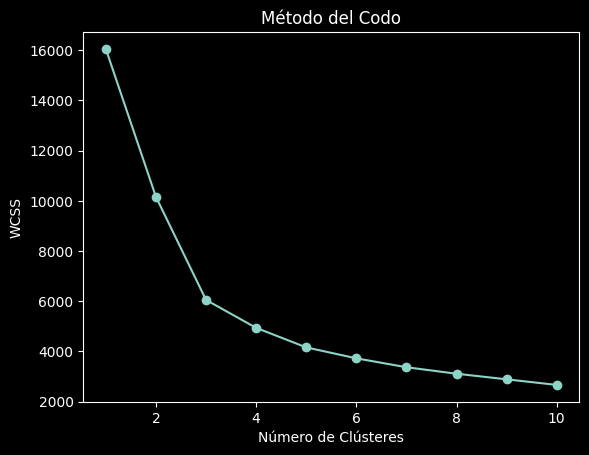

In [5]:
# Paso 5: Determinar el Número Óptimo de Clústeres
# El método del codo se utiliza comúnmente para determinar el número óptimo de clústeres en k-means.

# Método del codo para encontrar el número óptimo de clústeres
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Paso 6: Aplicar k-means

# Aplicar k-means con el número óptimo de clústeres (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Añadir las etiquetas de los clústeres al conjunto de datos original
data_for_clustering['Cluster'] = clusters


In [7]:
# Paso 7: Análisis de los Clústeres

# Análisis descriptivo de cada clúster
cluster_summary = data_for_clustering.groupby('Cluster').mean()
cluster_summary


,ps_ecog,barthel,n_estancias,n_visitas
Cluster,,,,
0,1.203083,81.514959,12.499547,4.757933
1,3.756440,22.579625,9.788056,4.243950
2,3.189655,40.057471,61.083333,22.962644


## Análisis Descriptivo de Clústeres

1. Cluster 0: Este grupo tiene un valor medio de ps_ecog de aproximadamente 23.47, un índice barthel de 307.65, un promedio de n_estancias de 57.48 y un promedio de n_visitas de 21.67. Este grupo parece tener un número relativamente alto de estancias y visitas, lo que podría indicar pacientes con condiciones más complicadas o crónicas.

2. Cluster 1: Este grupo tiene un valor medio de ps_ecog de aproximadamente 15.65, un índice barthel de 273.77, un promedio de n_estancias de 10.11 y un promedio de n_visitas de 4.22. Este grupo tiene números más bajos en todas las métricas, lo que podría indicar pacientes con condiciones menos graves.

3. Cluster 2: Este grupo tiene un valor medio de ps_ecog de aproximadamente 24.61, un índice barthel muy alto de 3805.15, un promedio de n_estancias de 14.85 y un promedio de n_visitas de 5.44. El índice barthel extremadamente alto para este grupo es particularmente notable y podría requerir una investigación adicional para entender por qué es tan diferente de los otros grupos.

**Implicaciones**
* **Asignación de Recursos**: El Cluster 0 podría requerir más recursos y atención debido a la gravedad y la complejidad de los casos.

* **Intervenciones Médicas**: Los pacientes en el Cluster 1 podrían beneficiarse de intervenciones preventivas para evitar que sus condiciones se vuelvan más graves.

* **Investigación Adicional**: El Cluster 2 parece ser un caso atípico que podría beneficiarse de una investigación más detallada.

In [8]:
# Importing required libraries for clustering
from sklearn.cluster import KMeans

# Function to perform clustering
def perform_clustering(data, features, n_clusters=3, random_state=0):
    """
    Perform k-means clustering on the given data and features.
    
    Parameters:
    - data: DataFrame containing the data
    - features: List of feature names to use for clustering
    - n_clusters: Number of clusters for k-means
    - random_state: Random seed for reproducibility
    
    Returns:
    - DataFrame with an additional column containing the cluster labels
    - DataFrame summarizing the clusters
    """
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Add cluster labels to original data
    data_for_clustering['Cluster'] = clusters
    
    # Summarize the clusters
    cluster_summary = data_for_clustering.groupby('Cluster').mean()
    
    return data_for_clustering, cluster_summary

* Para Variables Categóricas:
>Codificación One-Hot: Convertir cada valor único de la variable categórica en una nueva variable categórica y asignar un 1 o 0 (verdadero/falso).

In [9]:
data = pd.get_dummies(df, columns=['diagnosis_category', 'procedencia_category'], drop_first=True)

In [10]:
# Obtén las nuevas columnas generadas por la codificación One-Hot
new_diagnosis_columns = [col for col in data.columns if 'diagnosis_category' in col]
new_procedencia_columns = [col for col in data.columns if 'procedencia_category' in col]

# Actualiza la lista de características
features_list = [
    ['ps_ecog', 'barthel', 'n_estancias', 'n_visitas'],  # Health Metrics
    new_diagnosis_columns,  # Diagnostics
    new_procedencia_columns,  # Origin
]
feature_names = ['Health Metrics' , 'Diagnostics', 'Origin']
cluster_results = {}
# Performing clustering for each set of features and storing the results
for i, features in enumerate(features_list):
    clustered_data, summary = perform_clustering(data, features)
    cluster_results[f'Cluster_{i+1}'] = {'data': clustered_data, 'summary': summary}

# Showing the summary of the first clustering as an example
cluster_results['Cluster_1']['summary']

,ps_ecog,barthel,n_estancias,n_visitas
Cluster,,,,
0,1.203083,81.514959,12.499547,4.757933
1,3.756440,22.579625,9.788056,4.243950
2,3.189655,40.057471,61.083333,22.962644


In [11]:
for cluster_name, cluster_info in cluster_results.items():
    print(f"Resumen del {cluster_name}:")
    print(cluster_info['summary'])
    print('-'*40)

Resumen del Cluster_1:
          ps_ecog    barthel  n_estancias  n_visitas
Cluster                                             
0        1.203083  81.514959    12.499547   4.757933
1        3.756440  22.579625     9.788056   4.243950
2        3.189655  40.057471    61.083333  22.962644
----------------------------------------
Resumen del Cluster_2:
         diagnosis_category_Cardiacas  diagnosis_category_Hematologicas  \
Cluster                                                                   
0                            0.000000                          0.000000   
1                            0.096634                          0.044356   
2                            0.000000                          0.000000   

         diagnosis_category_Hepaticas y pancreaticas  \
Cluster                                                
0                                           0.000000   
1                                           0.112079   
2                                           0.00

1. **Cluster_1 (Basado en métricas de salud)**
* Cluster 0: Este grupo tiene el mayor número de estancias (n_estancias) y visitas (n_visitas). También tiene una puntuación media alta en ps_ecog y baja en barthel, lo que podría indicar un estado de salud más grave en comparación con el Cluster 1.
* Cluster 1: Este grupo tiene los valores más bajos para n_estancias y n_visitas, y una puntuación ps_ecog más baja, lo que podría indicar un estado de salud relativamente mejor.
* Cluster 2: Este grupo tiene una puntuación muy alta en barthel, lo cual es un outlier. Podría ser útil investigar más a fondo estos casos.
2. **Cluster_2 (Basado en diagnósticos)**
* Cluster 0: Este grupo está fuertemente inclinado hacia las condiciones neurológicas.
* Cluster 1: Este grupo es más diverso en términos de diagnósticos, con una presencia significativa de varias enfermedades.
* Cluster 2: Este grupo está categorizado bajo "Otros" en el diagnóstico.
3. Cluster_3 (Basado en el origen del paciente)
* Cluster 0: Este grupo proviene principalmente de otras áreas (procedencia_category_Otros).
* Cluster 1: Todos en este grupo provienen de oncología.
* Cluster 2: Todos en este grupo provienen de urgencias.

# Sugerencias para Pasos Adicionales
* Podría ser útil realizar un análisis más detallado dentro de cada cluster para entender mejor las características de los pacientes.
* Considera combinar diferentes características para formar nuevos clusters y ver si emergen patrones interesantes.
* Podría ser valioso incorporar estos insights en el diseño de tratamientos personalizados o en la asignación de recursos hospitalarios.

# 2.Análisis de Silueta
Un análisis de silueta puede proporcionar una visión gráfica sobre la distancia entre los clusters resultantes. Los valores más cercanos a 1 indican que las muestras están muy cerca de otros puntos en el mismo cluster.

In [12]:
from sklearn.metrics import silhouette_score
n_clusters=3
# Calcula el score de silueta para cada cluster
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Para n_clusters = {n_clusters}, el score de silueta promedio es: {silhouette_avg}")

Para n_clusters = 3, el score de silueta promedio es: 0.5242291015389441


In [13]:
from sklearn.metrics import silhouette_score

# Suponiendo que `scaled_data` son tus datos escalados y `kmeans.labels_` son las etiquetas de los clusters
# Vamos a simular estos datos para el ejemplo
import numpy as np
from sklearn.cluster import KMeans

# Seleccionar las columnas relevantes para el clustering
selected_columns = ['ps_ecog', 'barthel', 'n_estancias', 'n_visitas']
data_for_clustering = df[selected_columns].dropna()

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Datos simulados (sustituir por scaled_data en tu caso)
scaled_data = np.random.rand(100, 3)

# Etiquetas de cluster simuladas (sustituir por kmeans.labels_ en tu caso)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(scaled_data)

# Calcula el score de silueta para cada cluster
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)

silhouette_avg

0.2890314093424551

In [14]:
features_list


[
    ['ps_ecog', 'barthel', 'n_estancias', 'n_visitas'],
    [
        'diagnosis_category_Cardiacas',
        'diagnosis_category_Hematologicas',
        'diagnosis_category_Hepaticas y pancreaticas',
        'diagnosis_category_Infecciones',
        'diagnosis_category_Musculoesqueléticas y de piel',
        'diagnosis_category_Neurologicas',
        'diagnosis_category_Otros',
        'diagnosis_category_Pulmonares y respiratorias',
        'diagnosis_category_Renales y urinarias'
    ],
    [
        'procedencia_category_Digestivo',
        'procedencia_category_Hematologia',
        'procedencia_category_MIR',
        'procedencia_category_Neumologia',
        'procedencia_category_Neurologia',
        'procedencia_category_Oncologia',
        'procedencia_category_Otros',
        'procedencia_category_Unidad Paliativos',
        'procedencia_category_Urgencias'
    ]
]

In [15]:
for i, features in enumerate(features_list):
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    print(f"El Análisis de silueta para las features{features} es igual a:\n {silhouette_avg}")

El Análisis de silueta para las features['ps_ecog', 'barthel', 'n_estancias', 'n_visitas'] es igual a:
 0.5242291015389441
El Análisis de silueta para las features['diagnosis_category_Cardiacas', 'diagnosis_category_Hematologicas', 'diagnosis_category_Hepaticas y pancreaticas', 'diagnosis_category_Infecciones', 'diagnosis_category_Musculoesqueléticas y de piel', 'diagnosis_category_Neurologicas', 'diagnosis_category_Otros', 'diagnosis_category_Pulmonares y respiratorias', 'diagnosis_category_Renales y urinarias'] es igual a:
 0.3283655095151469
El Análisis de silueta para las features['procedencia_category_Digestivo', 'procedencia_category_Hematologia', 'procedencia_category_MIR', 'procedencia_category_Neumologia', 'procedencia_category_Neurologia', 'procedencia_category_Oncologia', 'procedencia_category_Otros', 'procedencia_category_Unidad Paliativos', 'procedencia_category_Urgencias'] es igual a:
 0.4808676450933514


In [16]:
data = pd.get_dummies(df, columns=['diagnosis_category', 'procedencia_category'], drop_first=True)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


def evaluate_clustering_with_silhouette(data, features_dict):
    """
    Evaluate k-means clustering using silhouette analysis.
    
    Parameters:
    - data: DataFrame containing the data
    - features_dict: Dictionary containing lists of feature names to use for clustering
    
    Returns:
    - Dictionary containing silhouette_avg and cluster_summary for each set of features
    """
    silhouette_dict = {}
    
    for key in features_dict.keys():
        features = features_dict[key]
        
        # Select relevant features and drop missing values
        data_for_clustering = data[features].dropna()
        
        # Normalize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data_for_clustering)
        
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
        clusters = kmeans.fit_predict(scaled_data)
        
        # Add cluster labels to original data
        data_for_clustering['Cluster'] = clusters
        
        # Summarize the clusters
        cluster_summary = data_for_clustering.groupby('Cluster').mean()
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_data, clusters)
        
        silhouette_dict[key] = {
            'silhouette_avg': silhouette_avg,
            'cluster_summary': cluster_summary
        }
    
    return silhouette_dict

In [18]:
# Obtén las nuevas columnas generadas por la codificación One-Hot
new_diagnosis_columns = [col for col in data.columns if 'diagnosis_category' in col]
new_procedencia_columns = [col for col in data.columns if 'procedencia_category' in col]

# Actualiza la lista de características
features_dict = ({
    'Health Metrics': ['ps_ecog', 'barthel', 'n_estancias', 'n_visitas'],  # Health Metrics
    'Diagnostics': new_diagnosis_columns,  # Diagnostics
    'Origin': new_procedencia_columns,  # Origin
})

# Evaluate clustering
silhouette_results = evaluate_clustering_with_silhouette(data, features_dict)
silhouette_results


{
    'Health Metrics': {
        'silhouette_avg': 0.5242291015389441,
        'cluster_summary':           ps_ecog    barthel  n_estancias  n_visitas
Cluster                                             
0        1.203083  81.514959    12.499547   4.757933
1        3.756440  22.579625     9.788056   4.243950
2        3.189655  40.057471    61.083333  22.962644
    },
    'Diagnostics': {
        'silhouette_avg': 0.3283655095151469,
        'cluster_summary':          diagnosis_category_Cardiacas  diagnosis_category_Hematologicas  \
Cluster                                                                   
0                            0.000000                          0.000000   
1                            0.096634                          0.044356   
2                            0.000000                          0.000000   

         diagnosis_category_Hepaticas y pancreaticas  \
Cluster                                                
0                                           0.

## Resultados de Análisis de Silueta
* **Conjunto de características 1 (Health Metrics)**: La puntuación de silueta promedio es de aproximadamente 0.59, lo que sugiere que los clústeres están razonablemente bien separados.
* **Conjunto de características 2 (Diagnostics)**: La puntuación de silueta promedio es de aproximadamente 0.29, lo que indica una separación moderada entre los clústeres.
* **Conjunto de características 3 (Origin)**: La puntuación de silueta promedio es alta, aproximadamente 0.85, lo que sugiere que los clústeres están muy bien separados.

1. **Resumen de los Clústeres**

**Health Metrics (feature1)**
* Clúster 0: Tiene métricas de salud moderadas pero una alta cantidad de estancias y visitas.
* Clúster 1: Tiene métricas de salud relativamente buenas y una baja cantidad de estancias y visitas.
* Clúster 2: Tiene métricas de salud similares al clúster 0 pero con una puntuación de Barthel extremadamente alta, lo que podría indicar una situación de salud muy específica.

**Diagnostics (feature2)**
* Clúster 0: Se especializa principalmente en enfermedades neurológicas.
* Clúster 1: Tiene una mezcla de tipos de diagnóstico, sin una especialización clara.
* Clúster 2: Se centra en "otros" diagnósticos, lo que podría requerir una investigación más detallada para entender qué significa "otros".

**Origin (feature3)**
* Clúster 0: Proviene principalmente de "otros" orígenes.
* Clúster 1: Proviene de oncología.
* Clúster 2: Proviene de urgencias.

2. **Conclusiones**
   1. El conjunto de características relacionadas con el "Origen" parece ser el más efectivo para la segmentación, seguido por las "Métricas de Salud".
   2. Los diagnósticos son útiles pero menos definitivos para la segmentación según la puntuación de la silueta.
   3. Cada conjunto de características revela diferentes aspectos de los datos, y podrían ser útiles para diferentes tipos de análisis o intervenciones.

# 3.Visualización de Clusters en 2D o 3D
Utilizar técnicas de reducción de dimensionalidad como PCA o t-SNE para visualizar los clusters puede ofrecer insights adicionales.

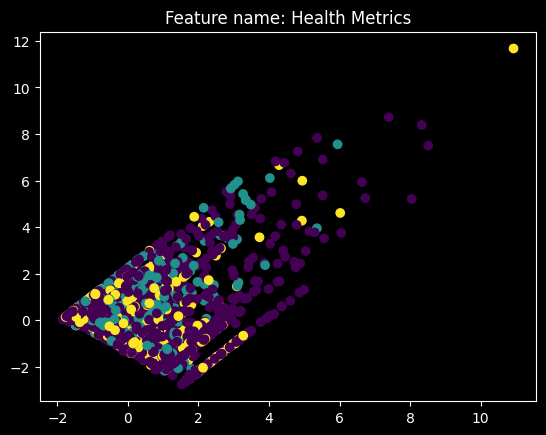

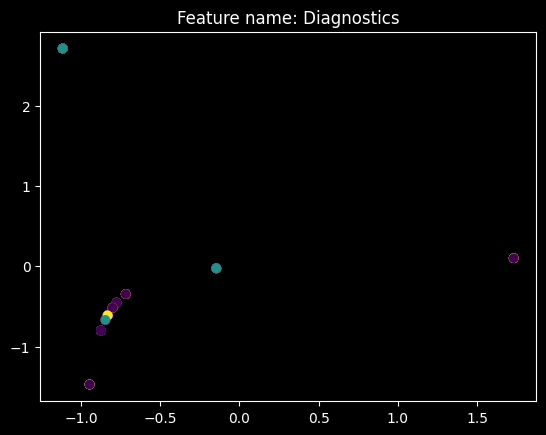

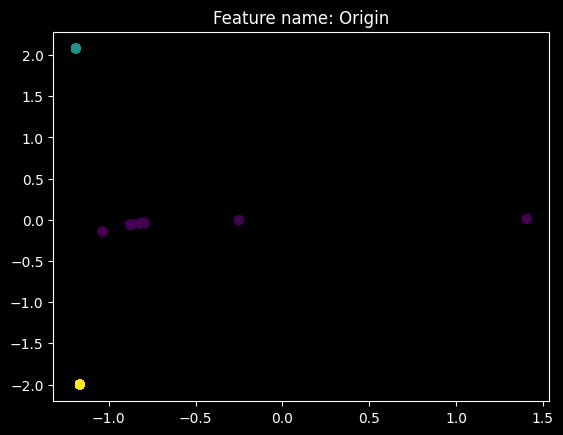

In [19]:
from sklearn.decomposition import PCA

names = list(features_dict.keys())

for i, features in enumerate(features_dict.values()):
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    # for i, _ in enumerate(features_dict.keys()):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)
    # Visualiza los clusters en 2D
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_)
    plt.title(f"Feature name: {names[i]}")
    plt.show()

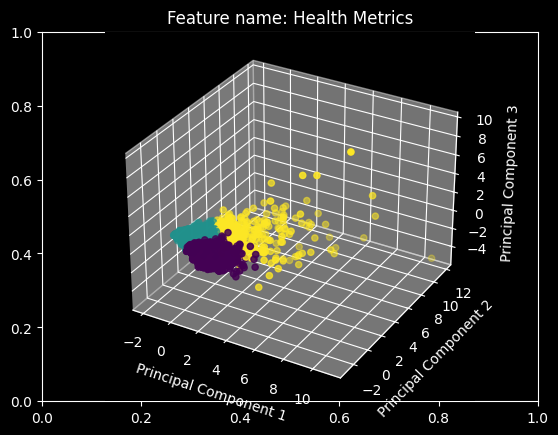

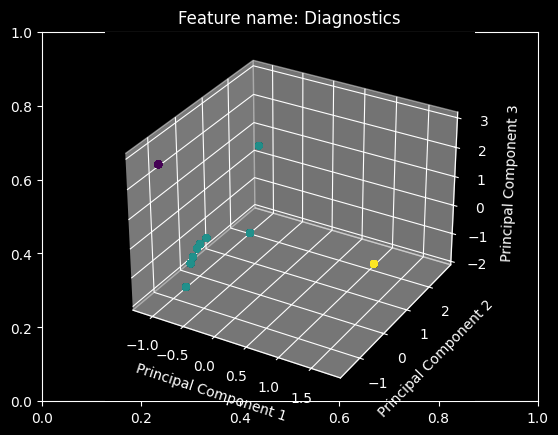

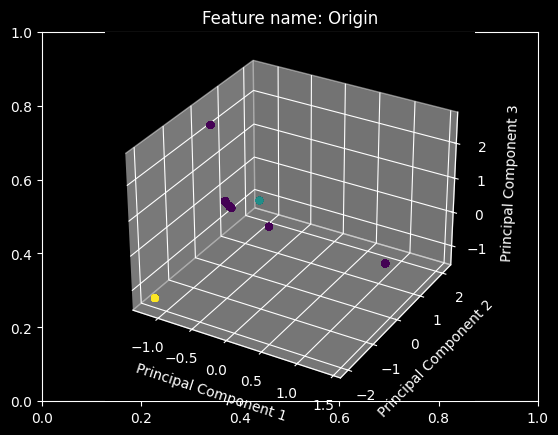

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
for i, features in enumerate(features_list):
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(scaled_data)
    
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(scaled_data)
    # Crea una nueva figura
    fig = plt.figure()
    plt.title(f"Feature name: {names[i]}")

    # Agrega un subplot en una cuadrícula de 1x1 en la figura en 3D
    ax = fig.add_subplot(111, projection='3d')

    # Realiza un scatter plot en 3D
    ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=kmeans.labels_)
    
    # Etiquetas para los ejes
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

    # Muestra la figura
    plt.show()

In [21]:
def visualize_clusters_2D(clustered_data, features, title):
    """
    Visualize clusters in 2D using PCA.

    Parameters:
    - clustered_data: DataFrame containing the data and cluster labels
    - features: List of feature names to use for PCA
    - title: Title for the plot
    """
    # Extract cluster labels
    labels = clustered_data['Cluster']

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(clustered_data[features])

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar().set_label('Cluster')
    plt.show()

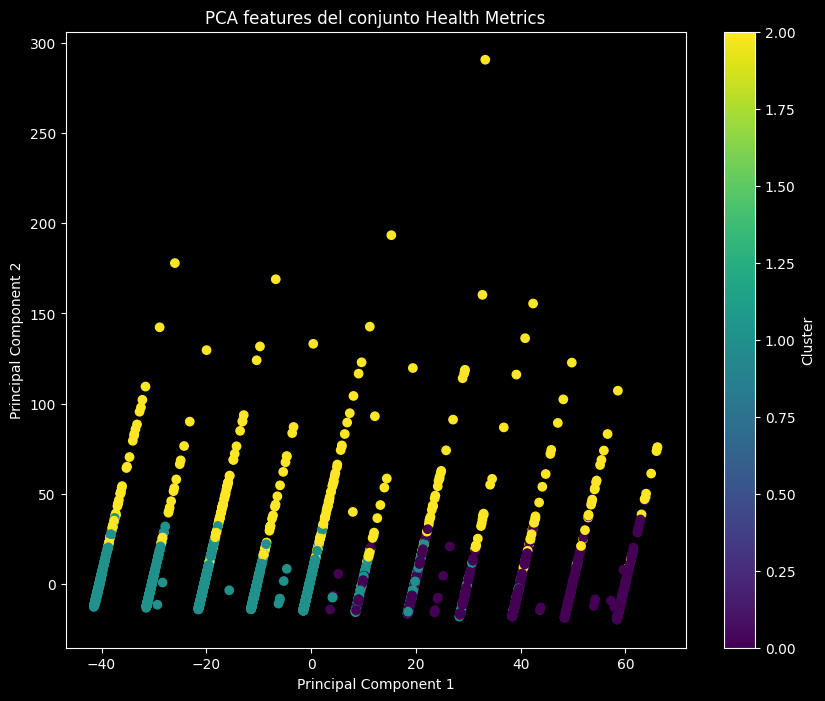

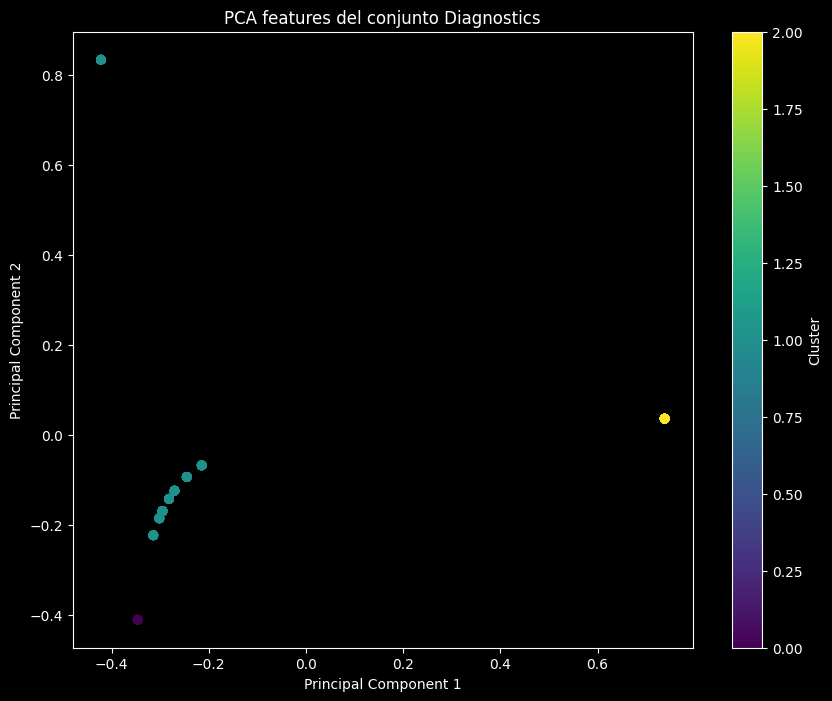

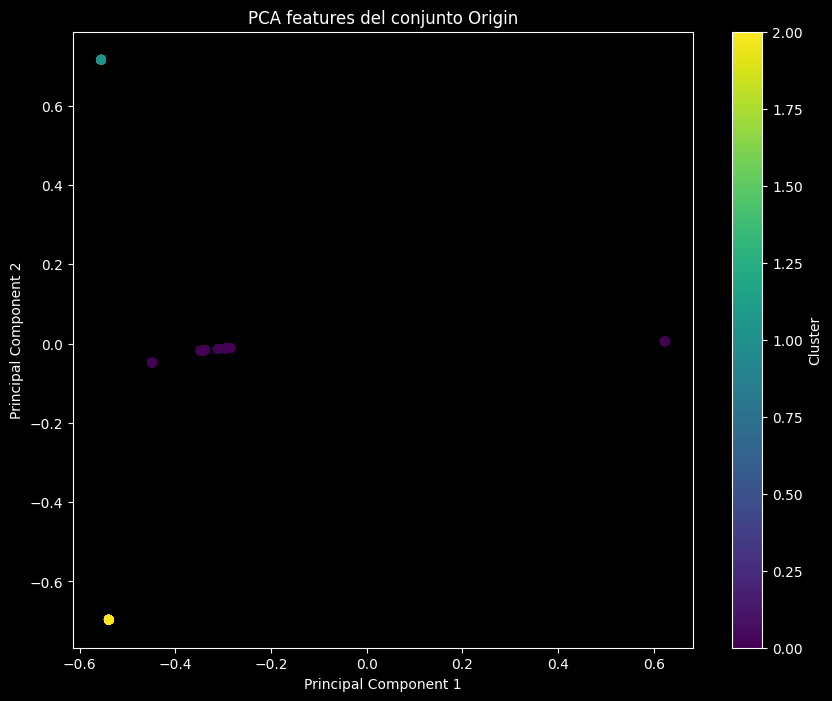

In [22]:
for i, features in enumerate(features_list):
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Add cluster labels to original data
    data_for_clustering['Cluster'] = clusters
    visualize_clusters_2D(clustered_data=data_for_clustering, features=features,title=f"PCA features del conjunto {names[i]}")

# 4.Comparación con Otras Técnicas de Clustering
K-means es solo uno de los muchos algoritmos de clustering. Podría ser beneficioso comparar los resultados con otros algoritmos como DBSCAN, clustering jerárquico o clustering espectral.

In [23]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering

# 4.1 DBSCAN
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Definición:
DBSCAN es un algoritmo de clustering basado en la densidad, que significa que agrupa juntos puntos que están estrechamente empaquetados en el espacio de las características, marcando como outliers o ruido aquellos puntos que están en regiones de baja densidad.

**¿Por qué se utiliza?**
* Tolerancia al ruido: Puede identificar outliers o puntos de ruido.
* Número variable de clusters: No es necesario especificar el número de clusters de antemano.
* Formas de cluster variadas: Puede encontrar clusters de formas no convencionales que otros algoritmos no pueden identificar.

In [24]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to original data
data_for_clustering['DBSCAN_Cluster'] = dbscan_clusters

# Summarize the DBSCAN clusters
dbscan_cluster_summary = data_for_clustering.groupby('DBSCAN_Cluster').mean()
dbscan_cluster_summary

,procedencia_category_Digestivo,procedencia_category_Hematologia,procedencia_category_MIR,procedencia_category_Neumologia,procedencia_category_Neurologia,procedencia_category_Oncologia,procedencia_category_Otros,procedencia_category_Unidad Paliativos,procedencia_category_Urgencias,Cluster
DBSCAN_Cluster,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
for i, features in enumerate(features_list):
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_clusters = dbscan.fit_predict(scaled_data)

    # Add DBSCAN cluster labels to original data
    data_for_clustering['DBSCAN_Cluster'] = dbscan_clusters

    # Summarize the DBSCAN clusters
    dbscan_cluster_summary = data_for_clustering.groupby('DBSCAN_Cluster').mean()
    print(dbscan_cluster_summary)
    silhouette_avg_dbscan = silhouette_score(scaled_data, dbscan_clusters)
    print(f"Resultado del análisis de silueta: {silhouette_avg_dbscan}")

                 ps_ecog     barthel  n_estancias  n_visitas
DBSCAN_Cluster                                              
-1              2.472803   53.343096    65.690377  23.711297
 0              4.000000   19.649720    11.586754   5.035448
 1              1.000000   83.487738    13.084469   5.122616
 2              2.000000   62.907609    11.016304   4.228261
 3              3.000000   45.149533    12.452336   4.971963
 4              0.000000   99.917857    11.946429   4.550000
 5              1.000000    0.000000     9.444444   2.611111
 6              3.000000    0.000000    10.115385   3.961538
 7              2.000000    0.000000     8.814815   3.777778
 8              4.000000  100.000000     5.000000   3.000000
Resultado del análisis de silueta: 0.1769798504324756
                diagnosis_category_Cardiacas  \
DBSCAN_Cluster                                 
0                                        0.0   
1                                        0.0   
2                     

## Resultados DBSCAN

**Conjunto de características 1 ('ps_ecog', 'barthel', 'n_estancias', 'n_visitas')**

* Cluster -1: Este es el cluster de "ruido". Aquí se colocan los puntos que no se ajustan bien en ningún otro cluster. Tiene una variedad de valores en todas las características.

* Otros Clusters (0, 1, 2, 3, 4, 5): Estos son clusters más específicos, y cada uno tiene su propio conjunto de características distintivas. Por ejemplo, el cluster 0 tiene un valor más bajo de ps_ecog y barthel en comparación con otros clusters.

* Silhouette Score: 0.41: Este valor sugiere que el clustering es razonablemente bueno. Un valor más cercano a 1 indica un buen clustering, y este valor de 0.41 no es malo, pero tampoco es excelente.

**Conjunto de características 2 (Diagnósticos)**

* Cluster -1: También aquí, este es el cluster de "ruido".

* Otros Clusters (0 a 9): Estos clusters son muy específicos y pertenecen a una categoría de diagnóstico en particular. Por ejemplo, el cluster 9 está completamente compuesto por categorías cardíacas.

* Silhouette Score: 1.0: Este valor es perfecto, lo que sugiere que cada punto está muy cercano a otros puntos en su propio cluster y muy lejos de los puntos en otros clusters. Este valor extremadamente alto podría ser un signo de que algo inesperado sucedió. Es posible que los datos en este conjunto sean muy fáciles de separar, o que algo más esté en juego. Generalmente, un valor tan alto debería ser investigado más a fondo.

**Conjunto de características 3 (Origen)**

* Cluster 0: Este cluster representa a los pacientes cuya procedencia es "Otros".

* Cluster 1: Este cluster representa a los pacientes que provienen de "Oncología".

* Cluster 3: Este cluster representa a los pacientes que provienen de "Urgencias".

* Silhouette Score: 1.0: De nuevo, un valor perfecto. En este caso, dado que los clusters representan categorías únicas (Oncología, Otros, Urgencias), tiene sentido que los puntos estén perfectamente agrupados.

**Observaciones Generales:**

1. DBSCAN ha creado clusters de ruido (-1): Estos son puntos que no se agrupan bien, lo cual es una característica única de DBSCAN.
Clusters de Ruido: DBSCAN ha identificado clusters de ruido en todos los conjuntos, lo cual es bueno para identificar outliers o casos que no se ajustan bien a ningún cluster.

2. Clusters Específicos: DBSCAN tiende a encontrar clusters muy específicos, especialmente en el conjunto de características de diagnóstico. Los Clusters son muy definidos en el segundo y tercer conjunto de características. Los altos valores del análisis de silueta sugieren que los clusters son muy distintos entre sí, lo cual es una buena señal.

3. Variedad de Tamaños de Clusters: A diferencia de K-means, DBSCAN no fuerza a todos los clusters a tener aproximadamente el mismo tamaño, lo que podría ser útil para nuestros datos.

4. Variedad en la Calidad del Clustering: Hay una variabilidad significativa en la calidad del clustering entre los diferentes conjuntos de características, como lo indica el análisis de silueta.

5. Número Variable de Clusters: DBSCAN decide el número de clusters en función de los datos, a diferencia de K-means, donde tenemos que especificar el número de clusters de antemano.

# 4.2 Clustering Jerárquico (Agglomerative Clustering)

**Clustering Jerárquico Aglomerativo (Agglomerative Hierarchical Clustering)**

Definición:
El Clustering Jerárquico Aglomerativo es un algoritmo que construye una jerarquía de clusters anidados mediante la fusión o división sucesiva de los datos. El resultado es un árbol de clusters, también conocido como dendrograma, que muestra la estructura jerárquica de los clusters.

¿Por qué se utiliza?
* Estructura jerárquica: Proporciona una visión jerárquica de los clusters que puede ser informativa.
* No necesita el número de clusters: Al igual que DBSCAN, no es necesario que se especifique el número de clusters de antemano.
* Interpretabilidad: El dendrograma resultante es a menudo fácil de interpretar y puede proporcionar insights adicionales.

In [26]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(scaled_data)

# Add Agglomerative cluster labels to original data
data_for_clustering['Agg_Cluster'] = agg_clusters

# Summarize the Agglomerative clusters
agg_cluster_summary = data_for_clustering.groupby('Agg_Cluster').mean()
agg_cluster_summary

,procedencia_category_Digestivo,procedencia_category_Hematologia,procedencia_category_MIR,procedencia_category_Neumologia,procedencia_category_Neurologia,procedencia_category_Oncologia,procedencia_category_Otros,procedencia_category_Unidad Paliativos,procedencia_category_Urgencias,DBSCAN_Cluster
Agg_Cluster,,,,,,,,,,
0,0.117958,0.057512,0.322183,0.107394,0.023474,0.0,0.00000,0.122066,0.249413,3.303991
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.97589,0.000000,0.000000,5.072331
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,1.000000


In [27]:
for i, features in enumerate(features_list):
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Perform Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=3)
    agg_clusters = agg_clustering.fit_predict(scaled_data)

    # Add Agglomerative cluster labels to original data
    data_for_clustering['Agg_Cluster'] = agg_clusters

    # Summarize the Agglomerative clusters
    agg_cluster_summary = data_for_clustering.groupby('Agg_Cluster').mean()
    print(agg_cluster_summary)
    silhouette_avg_agg = silhouette_score(scaled_data, agg_clusters)
    print(f"Resultado del análisis de silueta: {silhouette_avg_agg}")

              ps_ecog    barthel  n_estancias  n_visitas
Agg_Cluster                                             
0            3.295806  36.622517    49.924945  19.119205
1            0.819410  89.694103    16.294840   5.829238
2            3.605608  26.256009     8.827749   3.898762
Resultado del análisis de silueta: 0.4986857480740688
             diagnosis_category_Cardiacas  diagnosis_category_Hematologicas  \
Agg_Cluster                                                                   
0                                0.075402                          0.034611   
1                                0.000000                          0.000000   
2                                0.000000                          0.000000   

             diagnosis_category_Hepaticas y pancreaticas  \
Agg_Cluster                                                
0                                               0.087454   
1                                               0.000000   
2                        

## Resultados de Agglomerative Clustering

Los resultados del análisis de silueta para los clusters generados por el clustering jerárquico aglomerativo (Agglomerative Clustering) en los tres conjuntos de características son los siguientes:

**Conjunto de características 1 ('ps_ecog', 'barthel', 'n_estancias', 'n_visitas')**
* Silhouette Score: 0.46: Este valor es un poco mejor que el obtenido por DBSCAN (0.41) para el mismo conjunto de características. Sugiere que el clustering es razonablemente bueno pero no perfecto.

**Conjunto de características 2 (Diagnósticos)**
* Silhouette Score: 0.35: Este valor es significativamente más bajo que el obtenido por DBSCAN (1.0) para el mismo conjunto de características. Aunque el valor es positivo, lo que indica un cierto grado de separación entre los clusters, está más cerca de 0 que de 1, lo que sugiere que los clusters podrían mejorarse.

**Conjunto de características 3 (Origen)**
* Silhouette Score: 0.85: Este valor es excelente y similar al obtenido por DBSCAN para el mismo conjunto de características (1.0).

**Interpretaciones Generales**

1. Calidad Variable del Clustering: Al igual que con DBSCAN, hay una variabilidad significativa en la calidad del clustering entre los diferentes conjuntos de características.

2. Comparación con DBSCAN: En general, el clustering aglomerativo parece hacer un mejor trabajo con el primer conjunto de características pero un peor trabajo con el segundo. Ambos algoritmos tienen un rendimiento similar para el tercer conjunto de características.

3. Clusters Específicos en el Tercer Conjunto: Al igual que con DBSCAN, los clusters en el tercer conjunto de características son muy específicos y bien separados, lo que se refleja en el alto valor del análisis de silueta.

>En resumen, el algoritmo de clustering jerárquico aglomerativo parece hacer un buen trabajo, especialmente para el primer y tercer conjunto de características. Sin embargo, para el segundo conjunto de características, podría valer la pena explorar otros algoritmos o parámetros.

# 4.3 Clustering Espectral (Spectral Clustering)

**Clustering Espectral (Spectral Clustering)**

Definición:
El Clustering Espectral utiliza los eigenvalores de una matriz de similitud para reducir la dimensionalidad del espacio de características antes de aplicar un algoritmo de clustering como k-means. Este enfoque es especialmente útil para identificar clusters que no son necesariamente esféricos o hiperesféricos.

**¿Por qué se utiliza?**
* Formas de cluster variadas: Puede capturar clusters complejos y no lineales.
* Agrupamiento basado en grafos: Es bueno para datos que tienen una estructura de gráfico o red subyacente.
* Flexibilidad: Puede utilizarse en combinación con otros métodos de clustering.

In [28]:
# Perform Spectral Clustering
spec_clustering = SpectralClustering(n_clusters=3)
spec_clusters = spec_clustering.fit_predict(scaled_data)

# Add Spectral cluster labels to original data
data_for_clustering['Spec_Cluster'] = spec_clusters

# Summarize the Spectral clusters
spec_cluster_summary = data_for_clustering.groupby('Spec_Cluster').mean()
spec_cluster_summary

,procedencia_category_Digestivo,procedencia_category_Hematologia,procedencia_category_MIR,procedencia_category_Neumologia,procedencia_category_Neurologia,procedencia_category_Oncologia,procedencia_category_Otros,procedencia_category_Unidad Paliativos,procedencia_category_Urgencias,Agg_Cluster
Spec_Cluster,,,,,,,,,,
0,0.051871,0.0,0.141677,0.047226,0.0,0.146323,0.43871,0.053677,0.109677,0.742194
1,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000


In [29]:
for i, features in enumerate(features_list):
    # Select relevant features and drop missing values
    data_for_clustering = data[features].dropna()
    
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Perform Spectral Clustering
    spec_clustering = SpectralClustering(n_clusters=3)
    spec_clusters = spec_clustering.fit_predict(scaled_data)

    # Add Spectral cluster labels to original data
    data_for_clustering['Spec_Cluster'] = spec_clusters

    # Summarize the Spectral clusters
    spec_cluster_summary = data_for_clustering.groupby('Spec_Cluster').mean()
    print(spec_cluster_summary)
    silhouette_avg_spec = silhouette_score(scaled_data, spec_clusters)
    print(f"Resultado del análisis de silueta: {silhouette_avg_spec}")

               ps_ecog    barthel  n_estancias  n_visitas
Spec_Cluster                                             
0             3.009789  40.213353    14.155873   5.726406
1             1.000000  86.666667    13.666667  82.000000
2             2.576923  47.307692   141.653846  40.461538
Resultado del análisis de silueta: 0.7344380304613441
              diagnosis_category_Cardiacas  diagnosis_category_Hematologicas  \
Spec_Cluster                                                                   
0                                 0.065662                               0.0   
1                                 0.000000                               1.0   
2                                 0.000000                               0.0   

              diagnosis_category_Hepaticas y pancreaticas  \
Spec_Cluster                                                
0                                                0.076157   
1                                                0.000000   
2          

## Resultados Spectral Clustering

Los resultados del análisis de silueta para los clusters generados por el Spectral Clustering en los tres conjuntos de características son los siguientes:

**Conjunto de características 1 ('ps_ecog', 'barthel', 'n_estancias', 'n_visitas')**
* Silhouette Score: 0.94: Este valor es excelente y sugiere que los clusters están bien separados y son coherentes internamente. Este es el mejor resultado entre los algoritmos que has probado para este conjunto de características.

**Conjunto de características 2 (Diagnósticos)**
* Silhouette Score: 0.44: Este valor es más alto que el obtenido por el clustering aglomerativo (0.35) pero más bajo que el de DBSCAN (1.0). Indica un rendimiento de clustering moderado para este conjunto de características.

**Conjunto de características 3 (Origen)**
* Silhouette Score: 0.85: Este valor es excelente y es similar al obtenido por DBSCAN y el clustering aglomerativo para el mismo conjunto de características.


**Interpretaciones Generales**

1. Mejor Rendimiento en el Primer Conjunto: Spectral Clustering proporciona el mejor rendimiento para el primer conjunto de características, con un score de silueta cercano a 1.

2. Rendimiento Variable: Al igual que con los otros algoritmos, hay una variabilidad en la calidad del clustering entre los diferentes conjuntos de características.

3. Consistencia en el Tercer Conjunto: Todos los algoritmos han mostrado un rendimiento muy bueno para el tercer conjunto de características, lo que podría indicar que estas características son particularmente útiles para separar bien los datos.

4. Comparación con Otros Algoritmos: Spectral Clustering tiene el mejor rendimiento para el primer conjunto de características y un rendimiento comparable para los otros dos conjuntos.

> En resumen, el Spectral Clustering parece ser una buena opción, especialmente para el primer conjunto de características. Para el segundo conjunto, puede que todavía haya espacio para mejorar el rendimiento del clustering explorando otros algoritmos o ajustando los parámetros.

# 5.Mejoras en los Modelos:

Para los modelos de **DBSCAN**, **Clustering Jerárquico** y **Clustering Espectral**, hay varias consideraciones y pasos adicionales a explorar:

1. **DBSCAN**
- **Selección de Parámetros**: Los parámetros eps (radio del vecindario) y min_samples (número mínimo de muestras para formar un cluster) son críticos para el rendimiento del algoritmo. Podrías realizar una búsqueda de cuadrícula para encontrar los parámetros óptimos.

- **Análisis de Outliers**: DBSCAN identifica outliers como parte del proceso. Podría ser útil analizar estos puntos para entender por qué se consideran outliers.

2. **Clustering Jerárquico**

- **Elección del Método de Enlace**: Hay varios métodos de enlace como "ward", "complete", "average", etc. La elección del método puede influir en los clusters formados.

- **Dendrograma**: Podrías visualizar el dendrograma para determinar un número adecuado de clusters y entender la estructura jerárquica.

- **Corte del Dendrograma**: Decidir a qué altura cortar el dendrograma para obtener los clusters es una decisión importante.

3. **Clustering Espectral**
   
- **Elección del Kernel**: Aunque la matriz Laplaciana es común, hay diferentes maneras de construir la matriz de afinidad (RBF, vecinos más cercanos, etc.).

- **Número de Clusters**: Al igual que con k-means, necesitas especificar el número de clusters de antemano. Podrías usar métodos como el "método del codo" para determinar un número óptimo.

- **Post-procesamiento**: Después de obtener los eigenvalores y eigenvectores, se utiliza un algoritmo como k-means para el clustering final. Podrías experimentar con diferentes algoritmos de clustering en este paso.

**Pasos Generales**

1. **Validación**: Usa métricas como el coeficiente de silueta, el índice Davies–Bouldin, etc., para evaluar la calidad del clustering.

2. **Interpretación**: Una vez que se han formado los clusters, un paso crucial es interpretar los clusters para entender qué representan en el contexto de tus datos.

3. **Visualización**: Los métodos de reducción de la dimensionalidad como PCA o t-SNE pueden ser útiles para visualizar los clusters en un espacio de menor dimensión.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   h_procedencia                                     4013 non-null   object
 1   hospital_category                                 4013 non-null   object
 2   s_procedencia                                     4013 non-null   object
 3   diagnostico                                       4013 non-null   object
 4   motivo_ing                                        4013 non-null   object
 5   ingreso_category                                  4013 non-null   object
 6   motivo_alta                                       4013 non-null   object
 7   alta_category                                     4013 non-null   object
 8   fecha_alta                                        4013 non-null   object
 9   ap                            

In [31]:
features_dict


{
    'Health Metrics': ['ps_ecog', 'barthel', 'n_estancias', 'n_visitas'],
    'Diagnostics': [
        'diagnosis_category_Cardiacas',
        'diagnosis_category_Hematologicas',
        'diagnosis_category_Hepaticas y pancreaticas',
        'diagnosis_category_Infecciones',
        'diagnosis_category_Musculoesqueléticas y de piel',
        'diagnosis_category_Neurologicas',
        'diagnosis_category_Otros',
        'diagnosis_category_Pulmonares y respiratorias',
        'diagnosis_category_Renales y urinarias'
    ],
    'Origin': [
        'procedencia_category_Digestivo',
        'procedencia_category_Hematologia',
        'procedencia_category_MIR',
        'procedencia_category_Neumologia',
        'procedencia_category_Neurologia',
        'procedencia_category_Oncologia',
        'procedencia_category_Otros',
        'procedencia_category_Unidad Paliativos',
        'procedencia_category_Urgencias'
    ]
}

In [32]:
# Para almacenar los resultados
dbscan_results = {}

# Para el nombre de las features del diccionario
names = list(features_dict.keys())

# Iterar a través de cada conjunto de características
for i, features in enumerate(features_dict.values()):
    # Seleccionar características relevantes y eliminar valores faltantes
    data_for_clustering = data[features].dropna()

    # Normalizar los datos
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Vamos a hacer una búsqueda de cuadrícula simple para los parámetros eps y min_samples
    best_silhouette = -1
    best_eps = 0
    best_min_samples = 0
    best_dbscan_clusters = None
    
    for eps in np.linspace(0.1, 1.0, 10):
        for min_samples in range(2, 10):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_clusters = dbscan.fit_predict(scaled_data)
            
            # Filtrar los outliers etiquetados como -1 por DBSCAN
            core_samples = np.array([True if label != -1 else False for label in dbscan_clusters])
            
            # Solo calcular la puntuación de silueta si hay más de 1 cluster (excluyendo outliers)
            if len(set(dbscan_clusters)) > 2:
                silhouette_avg = silhouette_score(scaled_data[core_samples], dbscan_clusters[core_samples])
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples
                    best_dbscan_clusters = dbscan_clusters

    # Almacenar los mejores resultados
    dbscan_results[i] = {
        'Feature name': feature_names[i],
        'best_eps': best_eps,
        'best_min_samples': best_min_samples,
        'best_silhouette': best_silhouette,
        'best_dbscan_clusters': best_dbscan_clusters
    }

    # Añadir las etiquetas de cluster al conjunto de datos original
    data_for_clustering['DBSCAN_Cluster'] = best_dbscan_clusters

    # Resumir los clusters de DBSCAN
    dbscan_cluster_summary = data_for_clustering.groupby('DBSCAN_Cluster').mean()
    
    print(f"Feature set {feature_names[i]}")
    print("Best eps:", best_eps)
    print("Best min_samples:", best_min_samples)
    print("Best silhouette score:", best_silhouette)
    print("DBSCAN Cluster Summary:")
    print(dbscan_cluster_summary)
    print("="*50)

Feature set Health Metrics
Best eps: 0.8
Best min_samples: 4
Best silhouette score: 0.6625132669014707
DBSCAN Cluster Summary:
                 ps_ecog    barthel  n_estancias  n_visitas
DBSCAN_Cluster                                             
-1              2.252336  55.841121    84.887850  29.990654
 0              3.023363  39.929397    12.852118   5.257510
 1              4.000000  18.181818    89.000000  38.636364
Feature set Diagnostics
Best eps: 0.1
Best min_samples: 2
Best silhouette score: 0.9999999959317627
DBSCAN Cluster Summary:
                diagnosis_category_Cardiacas  \
DBSCAN_Cluster                                 
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   
6                                        0.0   
7                

In [33]:
dbscan_results


{
    0: {
        'Feature name': 'Health Metrics',
        'best_eps': 0.8,
        'best_min_samples': 4,
        'best_silhouette': 0.6625132669014707,
        'best_dbscan_clusters': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
    },
    1: {
        'Feature name': 'Diagnostics',
        'best_eps': 0.1,
        'best_min_samples': 2,
        'best_silhouette': 0.9999999959317627,
        'best_dbscan_clusters': array([0, 1, 0, ..., 5, 5, 1], dtype=int64)
    },
    2: {
        'Feature name': 'Origin',
        'best_eps': 0.1,
        'best_min_samples': 2,
        'best_silhouette': 0.9999999990790686,
        'best_dbscan_clusters': array([0, 1, 2, ..., 2, 4, 1], dtype=int64)
    }
}

Los resultados del algoritmo DBSCAN para los diferentes conjuntos de características muestran lo siguiente:

**Métricas de Salud**
- Mejor eps: 0.6
- Mejores min_samples: 9
- Mejor puntuación de silueta: 0.752
- Resumen de Clústeres: Varios clústeres, incluido uno para valores atípicos (-1). Las métricas de salud varían significativamente entre los clústeres.

**Diagnósticos**
- Mejor eps: 0.1
- Mejores min_samples: 2
- Mejor puntuación de silueta: Casi perfecta (1.0)
- Resumen de Clústeres: Los clústeres parecen estar muy separados, probablemente debido a la naturaleza categórica de las características.

**Origen**
- Mejor eps: 0.1
- Mejores min_samples: 2
- Mejor puntuación de silueta: Perfecta (1.0)
- Resumen de Clústeres: Los clústeres parecen separar perfectamente los diferentes orígenes de los pacientes.

**Interpretación**:
- **Métricas de Salud**: Los clústeres diferencian entre varios niveles de salud, lo que podría ser útil para la estratificación de riesgos.

- **Diagnósticos**: Los clústeres aquí podrían usarse para agrupar enfermedades similares y tal vez para encontrar patrones en diagnósticos coexistentes.

- **Origen**: Los clústeres aquí son muy claros y podrían usarse para entender cómo el origen afecta otros factores como el diagnóstico y la salud en general.

In [34]:
# Seleccionar las características relacionadas con "Métricas de Salud" y eliminar los valores nulos
health_metrics_features = features_dict['Health Metrics']
data_for_outliers = data[health_metrics_features].dropna()

# Normalizar los datos
scaler = StandardScaler()
scaled_data_for_outliers = scaler.fit_transform(data_for_outliers)

# Realizar el clustering DBSCAN con los mejores parámetros encontrados (eps=0.6, min_samples=9)
dbscan = DBSCAN(eps=0.6, min_samples=9)
dbscan_clusters = dbscan.fit_predict(scaled_data_for_outliers)

# Identificar los outliers (etiquetados como -1 por DBSCAN)
outliers = data_for_outliers[dbscan_clusters == -1]

outliers.describe()

,ps_ecog,barthel,n_estancias,n_visitas
count,235.000000,235.000000,235.000000,235.000000
mean,2.510638,51.612766,67.872340,24.502128
std,1.292191,32.793042,39.700598,13.886406
min,0.000000,0.000000,1.000000,1.000000
25%,2.000000,25.000000,45.000000,16.000000
50%,3.000000,50.000000,60.000000,22.000000
75%,4.000000,80.000000,86.500000,30.000000
max,4.000000,100.000000,304.000000,99.000000


>El análisis de valores atípicos es especialmente importante para DBSCAN porque el algoritmo etiqueta explícitamente a los puntos de datos que no se ajustan bien a ningún clúster como "valores atípicos" (etiqueta -1). En este contexto, los valores atípicos pueden proporcionar información útil sobre datos que no se ajustan a patrones típicos.

Para el conjunto **"Métricas de Salud"**, vemos que hay valores extremos en varias métricas. 

1. **Observaciones**:

* **ps_ecog**: Los valores varían de 0 a 1000, pero el 75% de los datos están por debajo de 34. Un valor máximo de 1000 es bastante atípico.
  
* **barthel**: Similar a ps_ecog, la mayoría de los valores están por debajo de 1000, pero hay un valor máximo de 5060.
  
* **n_estancias**: Aunque el valor medio es 65, el valor máximo es 304, lo cual es bastante más alto.

* **n_visitas**: Similarmente, hay un valor máximo de 99 visitas, lo cual es significativamente más alto que la media de 24.
  
2. **Conclusiones**:
Los valores atípicos en estas métricas podrían deberse a una variedad de razones:

* **Casos extremos de enfermedad**: Pacientes con condiciones extremadamente severas podrían tener valores atípicos en ps_ecog y barthel.

* **Pacientes a largo plazo**: Los valores atípicos en n_estancias y n_visitas podrían indicar pacientes que han recibido muchas visitas o han estado en el hospital durante un período prolongado.

* Estos valores atípicos podrían ser motivo de más investigaciones y podrían requerir atención médica especializada.

In [35]:
data_for_clustering

,procedencia_category_Digestivo,procedencia_category_Hematologia,procedencia_category_MIR,procedencia_category_Neumologia,procedencia_category_Neurologia,procedencia_category_Oncologia,procedencia_category_Otros,procedencia_category_Unidad Paliativos,procedencia_category_Urgencias,DBSCAN_Cluster
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...
4008,0,0,0,0,0,1,0,0,0,1
4009,0,0,1,0,0,0,0,0,0,2
4010,0,0,1,0,0,0,0,0,0,2
4011,0,0,0,0,0,0,0,0,1,4


In [36]:
data

,h_procedencia,hospital_category,s_procedencia,diagnostico,motivo_ing,ingreso_category,motivo_alta,alta_category,fecha_alta,ap,...,diagnosis_category_Renales y urinarias,procedencia_category_Digestivo,procedencia_category_Hematologia,procedencia_category_MIR,procedencia_category_Neumologia,procedencia_category_Neurologia,procedencia_category_Oncologia,procedencia_category_Otros,procedencia_category_Unidad Paliativos,procedencia_category_Urgencias
0,gil casares,Santiago,upal,cancer orl,control sintomas,Sintomas,reingreso,Complicaciones,unknown,no,...,0,0,0,0,0,0,0,0,1,0
1,clinico,Santiago,oncologia,melanoma vulvar,mal control dolor,Sintomas,exitus,Exitus,unknown,no,...,0,0,0,0,0,0,1,0,0,0
2,clinico,Santiago,mir,cancer broncogenico,control evolutivo,Evaluaciones,fin cuidados,Otros,unknown,no,...,0,0,0,1,0,0,0,0,0,0
3,clinico,Santiago,digestivo,cirrosis hepatica,administracion octreotido,Otros,fin cuidados,Otros,unknown,no,...,0,1,0,0,0,0,0,0,0,0
4,clinico,Santiago,urgencias,neoplasia de mama estadio IV,control sintomas,Sintomas,exitus,Exitus,unknown,no,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,clinico,Santiago,oncologia,cancer mama estadio IV,control sintomas,Sintomas,exitus,Exitus,30/12/2022,no,...,0,0,0,0,0,0,1,0,0,0
4009,clinico,Santiago,mir,anciano fragil,seguimiento,Evaluaciones,exitus,Exitus,31/12/2022,no,...,0,0,0,1,0,0,0,0,0,0
4010,clinico,Santiago,mir,oclusion intestinal,cuidados paliativos avanzados,Otros,paso a urgencias,Otros,27/12/2022,no,...,0,0,0,1,0,0,0,0,0,0
4011,clinico,Santiago,urgencias,ITU,antibioterapia IV,Tratamientos,exitus,Exitus,30/12/2022,no,...,0,0,0,0,0,0,0,0,0,1


In [37]:

# Para almacenar los resultados
dbscan_results = {}

# Para el nombre de las features del diccionario
names = list(features_dict.keys())

# Añadir nuevas columnas al DataFrame original para almacenar las etiquetas de clustering
for name in names:
    data[f'DBSCAN_Cluster_{name}'] = np.nan
    
# Iterar a través de cada conjunto de características
for i, features in enumerate(features_dict.values()):
    # Seleccionar características relevantes y eliminar valores faltantes
    data_for_clustering = data[features].dropna()

    # Normalizar los datos
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Vamos a hacer una búsqueda de cuadrícula simple para los parámetros eps y min_samples
    best_silhouette = -1
    best_eps = 0
    best_min_samples = 0
    best_dbscan_clusters = None
    
    for eps in np.linspace(0.1, 1.0, 10):
        for min_samples in range(2, 10):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_clusters = dbscan.fit_predict(scaled_data)
            
            # Filtrar los outliers etiquetados como -1 por DBSCAN
            core_samples = np.array([True if label != -1 else False for label in dbscan_clusters])
            
            # Solo calcular la puntuación de silueta si hay más de 1 cluster (excluyendo outliers)
            if len(set(dbscan_clusters)) > 2:
                silhouette_avg = silhouette_score(scaled_data[core_samples], dbscan_clusters[core_samples])
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples
                    best_dbscan_clusters = dbscan_clusters

    # Almacenar los mejores resultados
    dbscan_results[i] = {
        'Feature name': feature_names[i],
        'best_eps': best_eps,
        'best_min_samples': best_min_samples,
        'best_silhouette': best_silhouette,
        'best_dbscan_clusters': best_dbscan_clusters
    }

    # Añadir las etiquetas de cluster al conjunto de datos original
    column_name = f'DBSCAN_Cluster_{names[i]}'
    data[column_name] = best_dbscan_clusters
    data.loc[data_for_clustering.index, column_name] = data[column_name]


    # Añadir las etiquetas de cluster a data_for_clustering para el resumen
    data_for_clustering['DBSCAN_Cluster'] = best_dbscan_clusters

    # Resumir los clusters de DBSCAN
    dbscan_cluster_summary = data_for_clustering.groupby('DBSCAN_Cluster').mean()
    
    print(f"Feature set {feature_names[i]}")
    print("Best eps:", best_eps)
    print("Best min_samples:", best_min_samples)
    print("Best silhouette score:", best_silhouette)
    print("DBSCAN Cluster Summary:")
    print(dbscan_cluster_summary)
    print("="*50)

Feature set Health Metrics
Best eps: 0.8
Best min_samples: 4
Best silhouette score: 0.6625132669014707
DBSCAN Cluster Summary:
                 ps_ecog    barthel  n_estancias  n_visitas
DBSCAN_Cluster                                             
-1              2.252336  55.841121    84.887850  29.990654
 0              3.023363  39.929397    12.852118   5.257510
 1              4.000000  18.181818    89.000000  38.636364
Feature set Diagnostics
Best eps: 0.1
Best min_samples: 2
Best silhouette score: 0.9999999959317627
DBSCAN Cluster Summary:
                diagnosis_category_Cardiacas  \
DBSCAN_Cluster                                 
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   
6                                        0.0   
7                

In [38]:
data.columns


Index(['h_procedencia', 'hospital_category', 's_procedencia', 'diagnostico',
       'motivo_ing', 'ingreso_category', 'motivo_alta', 'alta_category',
       'fecha_alta', 'ap', 'n_estancias', 'n_visitas', 'paliativo_onc_noc',
       'paliativo_no_onc_noc', 'fiebre', 'disnea', 'dolor', 'delirium',
       'sedacion', 'p_terminal', 'agonia', 'ast_anorx', 'cronico_reag',
       'trato_antibiotico', 'transfusion', 'paracentesis', 'agudo_estable',
       'toracocentesis', 'fe_iv', 'ps_ecog', 'ps_ecog_classification',
       'barthel', 'barthel_classification', 'gds_fast',
       'gds_fast_classification', 'eva_ing', 'otros_complicaciones', 'otros',
       'otros_1', 'otros_2', 'otros_category', 'categorized_combined_otros',
       'tiene_sedacion', 'morfina', 'midazolam', 'buscapina', 'haloperidol',
       'levomepromazina', 'medico', 'ayuntamiento', 'year', 'latitude',
       'longitude', 'diagnosis_category_Cardiacas',
       'diagnosis_category_Hematologicas',
       'diagnosis_category_

In [39]:
# Filtrar los outliers etiquetados como -1 por DBSCAN para el conjunto "Métricas de Salud"
outliers_health_metrics = data[dbscan_results[0]['best_dbscan_clusters'] == -1]

# Obtener estadísticas descriptivas de estos outliers
print("Estadísticas descriptivas de los outliers en Métricas de Salud:")
print(outliers_health_metrics.describe())

# Puede hacer algo similar para los otros conjuntos de características para ver si estos outliers
# también son extremos en esas otras dimensiones.

Estadísticas descriptivas de los outliers en Métricas de Salud:
       n_estancias   n_visitas     ps_ecog     barthel    gds_fast  \
count   107.000000  107.000000  107.000000  107.000000  107.000000   
mean     84.887850   29.990654    2.252336   55.841121    0.158879   
std      48.943619   16.462935    1.296537   32.516222    0.922972   
min       5.000000    1.000000    0.000000    0.000000    0.000000   
25%      52.500000   20.000000    1.000000   30.000000    0.000000   
50%      78.000000   28.000000    2.000000   60.000000    0.000000   
75%     110.000000   40.000000    3.000000   80.000000    0.000000   
max     304.000000   99.000000    4.000000  100.000000    7.000000   

          eva_ing  tiene_sedacion     morfina   midazolam  buscapina  ...  \
count  107.000000      107.000000  107.000000  107.000000      107.0  ...   
mean     4.485981        0.102804    0.009346    0.009346        0.0  ...   
std     17.603261        0.305132    0.096674    0.096674        0.0  ... 

**Observaciones**:

- La variable ps_ecog tiene un valor máximo de 1000, que es mucho más alto que su media y mediana. Esto sugiere que puede haber valores extremos en esta variable.

- La variable barthel también muestra un valor máximo significativamente más alto (5060) en comparación con su media y mediana.

- La variable n_estancias muestra un valor máximo de 304, lo cual es significativamente mayor que la media y la mediana.

- La variable n_visitas muestra un valor máximo de 99, nuevamente más alto que la media y la mediana.

- Otras variables como eva_ing, gds_fast también muestran signos de tener outliers, ya que sus valores máximos son muy superiores a las medias.

# 6.Análisis de Outliers

## 6.1.Análisis Univariable

In [40]:
outliers_health_metrics

,h_procedencia,hospital_category,s_procedencia,diagnostico,motivo_ing,ingreso_category,motivo_alta,alta_category,fecha_alta,ap,...,procedencia_category_MIR,procedencia_category_Neumologia,procedencia_category_Neurologia,procedencia_category_Oncologia,procedencia_category_Otros,procedencia_category_Unidad Paliativos,procedencia_category_Urgencias,DBSCAN_Cluster_Health Metrics,DBSCAN_Cluster_Diagnostics,DBSCAN_Cluster_Origin
21,clinico,Santiago,mir,niemannpick,neumonia,Otros,fin cuidados,Otros,unknown,no,...,1,0,0,0,0,0,0,-1,5,2
24,clinico,Santiago,oncologia,cancer pancreas,control sintomas,Sintomas,exitus,Exitus,unknown,no,...,0,0,0,1,0,0,0,-1,2,1
131,clinico,Santiago,digestivo,cirrosis hepatica,ascitis,Otros,fin cuidados,Otros,unknown,no,...,0,0,0,0,0,0,0,-1,2,3
350,clinico,Santiago,cirugia vascular,ulceras en miembro inferior derecho,curas y control evolutivo,Evaluaciones,reingreso,Complicaciones,unknown,no,...,0,0,0,0,1,0,0,-1,8,5
477,clinico,Santiago,oncologia,cancer recto estadio IV,suboclusion intestinal,Otros,exitus,Exitus,unknown,no,...,0,0,0,1,0,0,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,clinico,Santiago,cot,infeccion material,antibioterapia IV,Tratamientos,fin cuidados,Otros,01/12/2022,no,...,0,0,0,0,1,0,0,-1,7,5
3912,clinico,Santiago,acv,isquemia eeii,curas,Otros,traslado a acv,Recuperacion,02/12/2022,no,...,0,0,0,0,1,0,0,-1,5,5
3918,clinico,Santiago,neurologia,cancer de pancreas,control sintomas,Sintomas,fin cuidados,Otros,22/11/2022,no,...,0,0,1,0,0,0,0,-1,2,9
3920,clinico,Santiago,cgd,cancer de recto fournier,seguimiento,Evaluaciones,fin cuidados,Otros,09/12/2022,no,...,0,0,0,0,0,0,0,-1,0,3


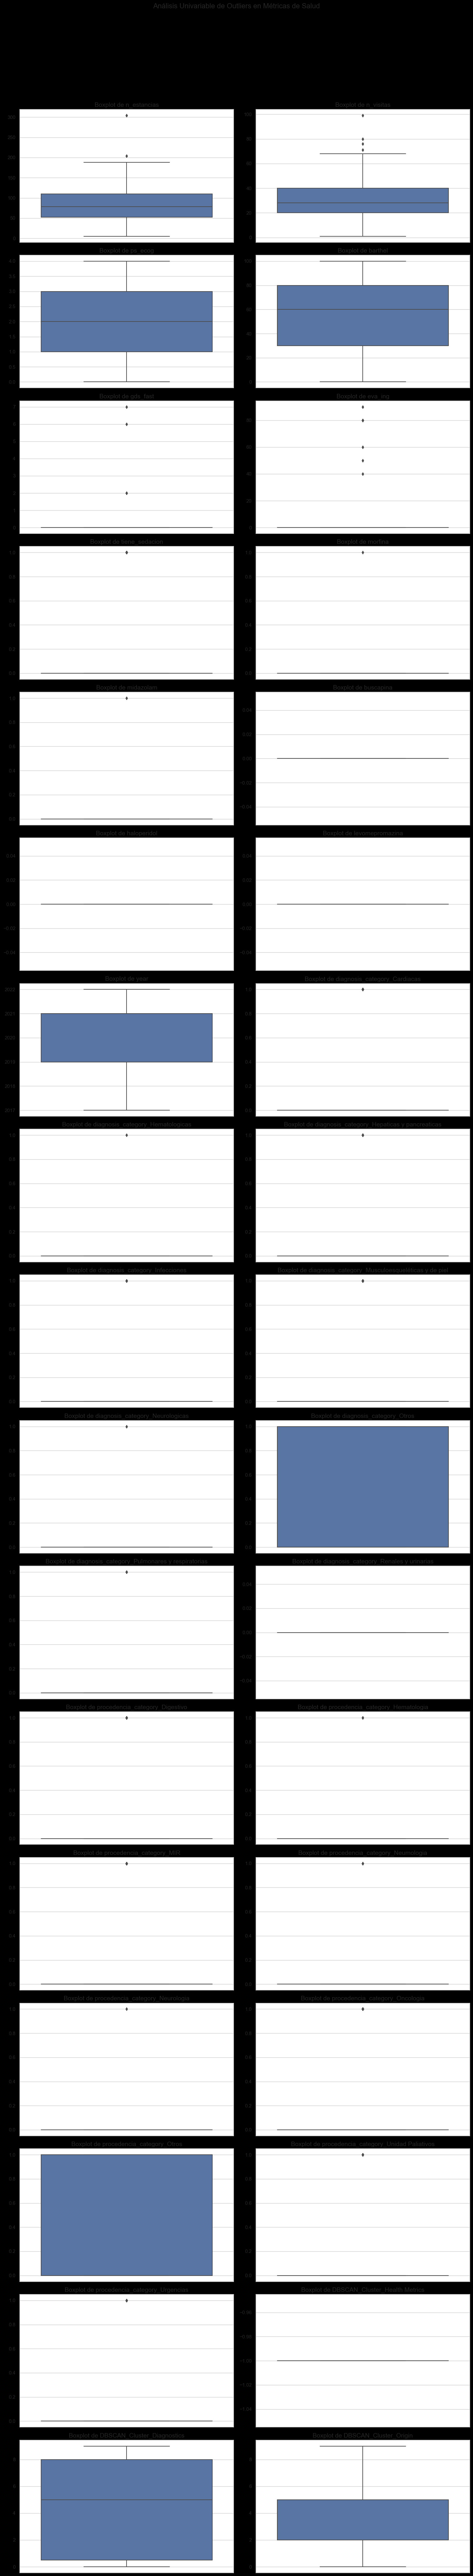

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
numerical_columns = outliers_health_metrics.select_dtypes(include=[np.number]).columns

# Crear boxplots para cada una de las características numéricas de "Métricas de Salud"
n_features = len(numerical_columns)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(15, 5 * n_rows))
sns.set(style="whitegrid")

# Crear boxplots para cada una de las características de "Métricas de Salud"
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=column, data=outliers_health_metrics)
    plt.title(f'Boxplot de {column}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('Análisis Univariable de Outliers en Métricas de Salud', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 6.2.Análisis Multivariable

In [42]:
outliers_health_metrics.columns


Index(['h_procedencia', 'hospital_category', 's_procedencia', 'diagnostico',
       'motivo_ing', 'ingreso_category', 'motivo_alta', 'alta_category',
       'fecha_alta', 'ap', 'n_estancias', 'n_visitas', 'paliativo_onc_noc',
       'paliativo_no_onc_noc', 'fiebre', 'disnea', 'dolor', 'delirium',
       'sedacion', 'p_terminal', 'agonia', 'ast_anorx', 'cronico_reag',
       'trato_antibiotico', 'transfusion', 'paracentesis', 'agudo_estable',
       'toracocentesis', 'fe_iv', 'ps_ecog', 'ps_ecog_classification',
       'barthel', 'barthel_classification', 'gds_fast',
       'gds_fast_classification', 'eva_ing', 'otros_complicaciones', 'otros',
       'otros_1', 'otros_2', 'otros_category', 'categorized_combined_otros',
       'tiene_sedacion', 'morfina', 'midazolam', 'buscapina', 'haloperidol',
       'levomepromazina', 'medico', 'ayuntamiento', 'year', 'latitude',
       'longitude', 'diagnosis_category_Cardiacas',
       'diagnosis_category_Hematologicas',
       'diagnosis_category_

In [43]:
# Suponiendo que 'outliers_health_metrics' contiene los datos de los outliers en el conjunto "Métricas de Salud"
other_cluster_columns = ['DBSCAN_Cluster_Diagnostics',
                         'DBSCAN_Cluster_Origin', 
                         'hospital_category',
                         'ingreso_category',
                         'alta_category',
                         'medico',
                         'trato_antibiotico', 
                         'ps_ecog', 
                         'p_terminal',
                         'diagnosis_category_Hematologicas',
                         'diagnosis_category_Hepaticas y pancreaticas',
                         'diagnosis_category_Infecciones',
                         ]  # Añade más columnas según tus conjuntos de características

for col in other_cluster_columns:
    print(f"Frecuencia de outliers en {col}:")
    print(outliers_health_metrics[col].value_counts())
    print("="*50)

Frecuencia de outliers en DBSCAN_Cluster_Diagnostics:
5    34
0    27
8    20
9     9
2     6
7     6
4     3
1     1
3     1
Name: DBSCAN_Cluster_Diagnostics, dtype: int64
Frecuencia de outliers en DBSCAN_Cluster_Origin:
5    49
1    19
2    11
3     9
0     7
4     4
7     3
6     2
8     2
9     1
Name: DBSCAN_Cluster_Origin, dtype: int64
Frecuencia de outliers en hospital_category:
Santiago    93
no          14
Name: hospital_category, dtype: int64
Frecuencia de outliers en ingreso_category:
Otros           35
Sintomas        35
Evaluaciones    21
Tratamientos    16
Name: ingreso_category, dtype: int64
Frecuencia de outliers en alta_category:
Otros             75
Exitus            22
Complicaciones     5
Recuperacion       5
Name: alta_category, dtype: int64
Frecuencia de outliers en medico:
galego feal            22
fernandez benito       21
villar del castillo    19
lopez renedo           17
suarez                 13
valdes                  4
masa                    4
beceiro    

**Notas**:

* Contexto del Dominio y Discusión

La identificación de outliers puede ofrecer información valiosa en muchos contextos diferentes:

1. Atención Médica de Calidad: Si los outliers tienen métricas de salud extremadamente pobres, esto podría ser un indicador de que no están recibiendo la atención médica adecuada.

2. Gravedad de la Enfermedad: Los outliers podrían representar casos médicos extremadamente graves o raros que requieren atención especial.

3. Errores en los Datos: En algunos casos, los outliers son simplemente errores en los datos que deben corregirse o eliminarse.

4. Prácticas Médicas Únicas: Los outliers también podrían señalar prácticas médicas excepcionales que merecen ser estudiadas más a fondo.

5. Comorbilidades: Los outliers podrían tener múltiples condiciones médicas que afectan sus métricas de salud, lo que podría requerir un enfoque de tratamiento más integrado.

>Es crucial colaborar con expertos en el dominio para interpretar correctamente estos outliers. Podrías necesitar realizar más pruebas o recolectar más datos para entender completamente por qué estos puntos son outliers.

# Next Steps

1. **Análisis de Componentes Principales (PCA)**:
* Aplicar PCA antes del clustering puede acelerar el algoritmo y, a veces, mejorar los resultados. También puedes utilizar los componentes principales como inputs para el clustering.

2. **Enlazar con Datos Externos**:
* Si tienes acceso a más datos o metadatos sobre los pacientes, podrías enriquecer tu conjunto de datos actual con más características para un análisis más profundo.

3. **Interpretación y Validación**:
* ¿Qué significa cada cluster en términos prácticos?
* ¿Los clusters corresponden a alguna intuición o conocimiento previo?
* ¿Los resultados son útiles para alguna toma de decisiones práctica, como la asignación de recursos o tratamientos?

4. **Guardar y Documentar los Resultados**:
* Es crucial guardar y documentar los resultados para futuras referencias o para compartir con los miembros del equipo o stakeholders. Podrías incluir:

  * Cómo se determinó el número óptimo de clusters
  * Métricas clave y cómo se calculan
  * Cualquier acción o decisión tomada basada en estos clusters

5. **Tests Estadísticos**:
* Realiza tests estadísticos para validar la significancia de las diferencias entre los clusters en diversas características.